 #  6.2 Exploring Relationships Part 2
 

# 1. Importing Visualization Libraries and Data

In [1]:
# Importing Visualization Libraries and Data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.2.2'

In [3]:
# Ensuring the charts are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
# Define path

path = '/Users/seanward/Desktop/Achievement 6- Covid-Testing'

In [7]:
# Importing data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'worldometer_data_edited4.csv'))

# 2. Merging two data sets

In [8]:
df.dtypes

Country/Region                      object
Population                           int64
Total Cases                          int64
Total Deaths                         int64
% of Population With Covid          object
% of Cases that Result in Death     object
Tot Cases/1M pop                     int64
Deaths/1M pop                      float64
Total Tests                          int64
Tests/1M pop                         int64
WHO Region                          object
Country Test Rate                  float64
country_flag                        object
dtype: object

# 3. Creating Correlation Heatmap (Question 3)

In [9]:
# Question 3: Create a correlation matrix using pandas

df.corr()

,Population,Total Cases,Total Deaths,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Country Test Rate
Population,1.000000,0.546371,0.434744,-0.011070,0.036761,0.497937,-0.075129,-0.075129
Total Cases,0.546371,1.000000,0.938693,0.252566,0.282631,0.891001,0.029141,0.029141
Total Deaths,0.434744,0.938693,1.000000,0.236790,0.426750,0.851247,0.036386,0.036386
Tot Cases/1M pop,-0.011070,0.252566,0.236790,1.000000,0.500181,0.194120,0.302728,0.302728
Deaths/1M pop,0.036761,0.282631,0.426750,0.500181,1.000000,0.273527,0.109961,0.109961
Total Tests,0.497937,0.891001,0.851247,0.194120,0.273527,1.000000,0.096177,0.096177
Tests/1M pop,-0.075129,0.029141,0.036386,0.302728,0.109961,0.096177,1.000000,1.000000
Country Test Rate,-0.075129,0.029141,0.036386,0.302728,0.109961,0.096177,1.000000,1.000000


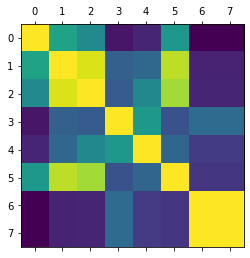

In [10]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

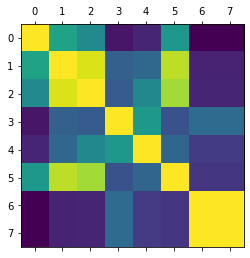

In [11]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

Text(0.5, 1.05, 'Correlation Matrix')

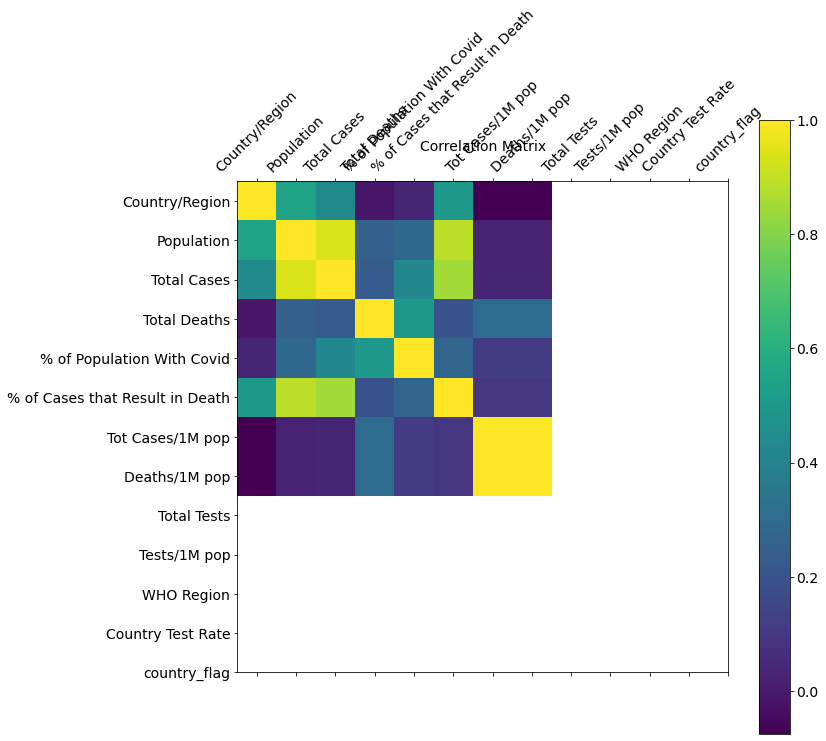

In [12]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(11, 11)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [13]:
df.columns

Index(['Country/Region', 'Population', 'Total Cases', 'Total Deaths',
       '% of Population With Covid', '% of Cases that Result in Death',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'WHO Region', 'Country Test Rate', 'country_flag'],
      dtype='object')

In [14]:
# Create a subset 

sub = df[[ 'Population', 'Total Cases', 'Total Deaths', 'Total Tests']]

In [15]:
sub

,Population,Total Cases,Total Deaths,Total Tests
0,331198130,5032179,162804,63139605
1,212710692,2917562,98644,13206188
2,1381344997,2025409,41638,22149351
3,145940924,871894,14606,29716907
4,59381566,538184,9604,3149807
...,...,...,...,...
186,53237,17,0,1146
187,56780,14,0,5977
188,4992,13,1,61
189,26247,13,0,424


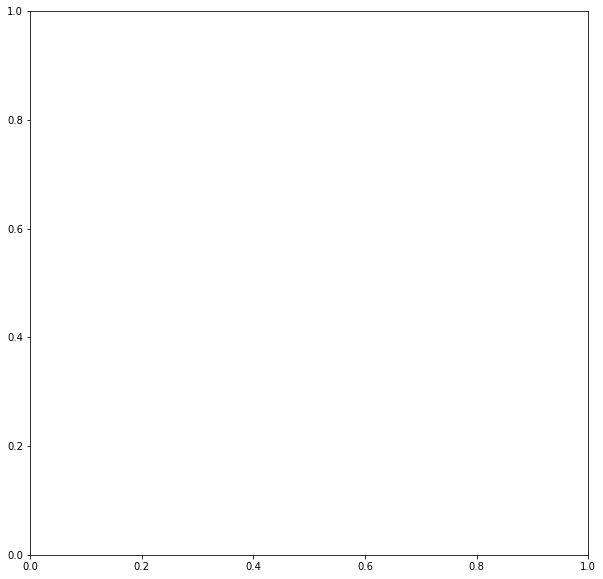

In [16]:
# Create a subplot with matplotlib. Creating an empty output, to show the subplots.

f,ax = plt.subplots(figsize=(10,10))

In [17]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 



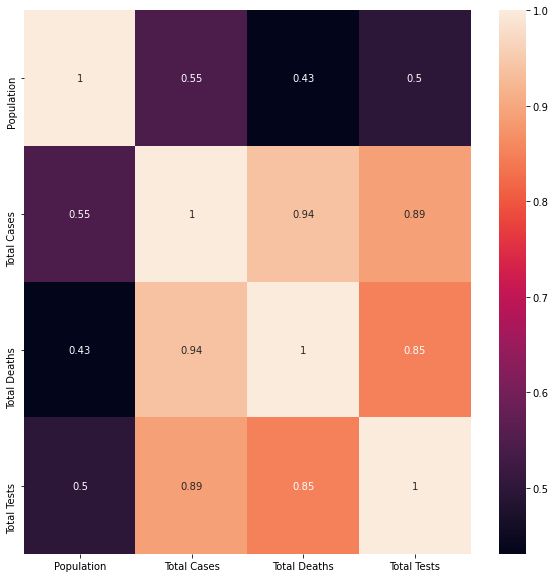

In [19]:
corr.figure

In [31]:
# Question 3 answer: There is a very strong correlation between Total Cases and Total Deaths (0.94).  There is also
# strong correlation between and Total Tests and Total Cases (0.89).  Population has a weak correlation between the
# variables (0.55 is the highest).  There does seem to be a strong connection between Tests and Cases...and then 
# Cases and Deaths.  



# Scatterplot

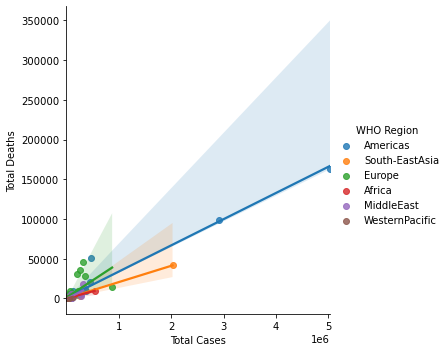

In [20]:
# Question 4 Create a scatterplot for the "Total Cases" and "Total Deaths" columns in seaborn

sns.lmplot(x = 'Total Cases', y = 'Total Deaths',hue = 'WHO Region', data = df)

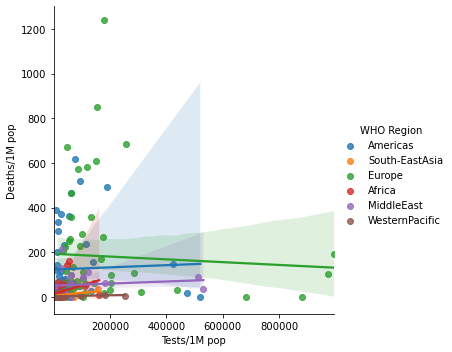

In [22]:
# Question 4 Create a scatterplot for the "Tests/1M pop" and "Deaths/1M pop" columns in seaborn

sns.lmplot(x = 'Tests/1M pop', y = 'Deaths/1M pop', hue = 'WHO Region', data = df)

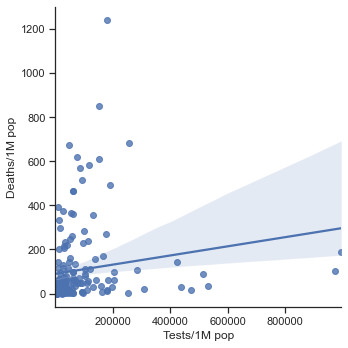

In [85]:
# Question 4 Create a scatterplot for the "Tests/1M pop" and "Deaths/1M pop" columns in seaborn

sns.lmplot(x = 'Tests/1M pop', y = 'Deaths/1M pop', data = df)

# Pair Plots

In [23]:
# Question 5: Keeping only the variables I want to use in the pair plot

sub_2 = sub[['Population', 'Total Tests', 'Total Cases', 'Total Deaths']]

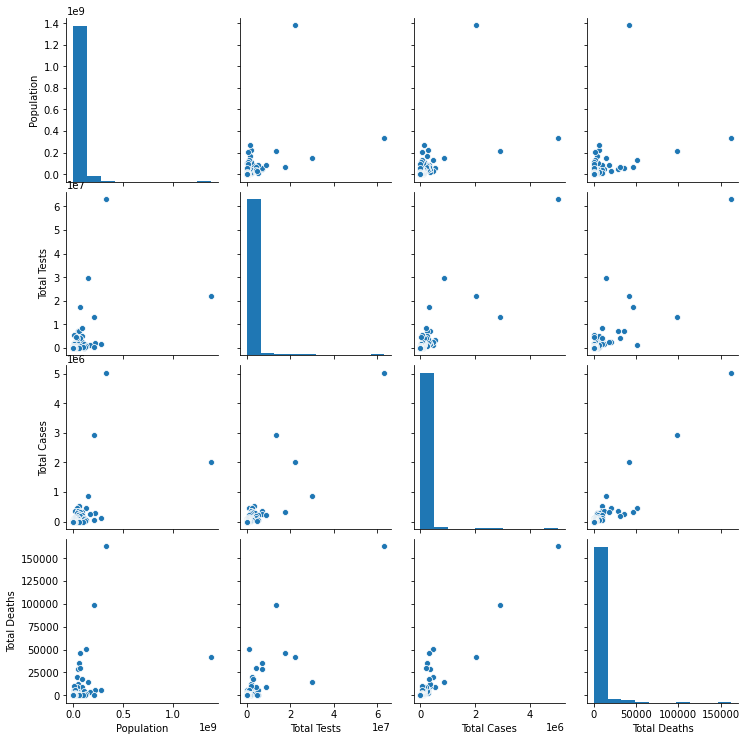

In [24]:
# Create a pair plot 

g = sns.pairplot(sub_2)

# Categorical Plot

# Question 6, Creating a categorical plot.  Using the % of Population Tested of each country to determine the flag.


In [25]:
df['Test Rate'] = df['Total Tests']/df['Population']

In [26]:
df['% of Population Tested'] = df.groupby(['Country/Region'])['Test Rate'].transform(np.mean)

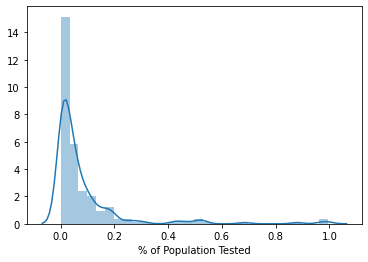

In [27]:
# Use a histogram to visualize the distribution of the variables to help determine the best categories

sns.distplot(df['% of Population Tested'], bins = 30)

In [28]:
df.loc[df['Country Test Rate'] < 0.03, 'country_flag'] = 'Lower Test Rate'

In [29]:
df.loc[(df['Country Test Rate'] > 0.03) & (df['Country Test Rate'] < 0.1), 'country_flag'] = 'Medium Test Rate'

In [30]:
df.loc[df['Country Test Rate'] > 0.1, 'country_flag'] = 'High Test Rate'

In [31]:
df['country_flag'].value_counts(dropna = False)

Lower Test Rate     87
Medium Test Rate    61
High Test Rate      43
Name: country_flag, dtype: int64

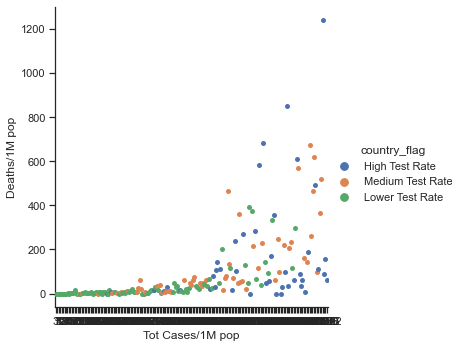

In [32]:
# Create a categorical plot in seaborn using the categories created above

sns.set (style = "ticks")
g = sns.catplot(x="Tot Cases/1M pop", y="Deaths/1M pop", hue="country_flag", data=df)

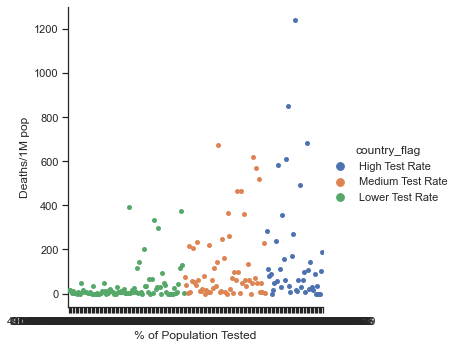

In [33]:
# Create a categorical plot in seaborn using the categories created above

sns.set (style = "ticks")
g = sns.catplot(x="% of Population Tested", y="Deaths/1M pop", hue="country_flag", data=df)

# Grouping the data to look at different stats (Extra)

In [34]:
path2 = df.groupby('country_flag').agg({'Deaths/1M pop': ['mean'], 'Tot Cases/1M pop': ['mean'], 'Population': ['mean'], 'Tests/1M pop': ['mean'] })

In [35]:
# Checking the comparison between Deaths/1M pop, Tot Cases/1M pop, Population and Tests/1M pop

path2

,Deaths/1M pop,Tot Cases/1M pop,Population,Tests/1M pop
,mean,mean,mean,mean
country_flag,,,,
High Test Rate,176.581395,7169.930233,2.205539e+07,273838.441860
Lower Test Rate,36.011264,1115.528736,4.623393e+07,9982.597701
Medium Test Rate,124.770492,3915.524590,1.723403e+07,55618.032787


In [ ]:
# I can see the highest death total comes from the high test rate countries.  They also have way more cases
# per 1M population as well.  The biggest population comes from the lower test rate countries...which is more
# than double both high and medium test rate countries.  This shows that there isn't such a strong correlation
# between testing and death rates.

In [36]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'worldometer_data_edited5.csv')) 